In [1]:
import pandas as pd

In [2]:
file_path = "./02_data_통합본/df_bus_card_tot.csv"
df_bus_card_tot = pd.read_csv(file_path)
df_bus_card_tot

,승차시각,하차시각,승객연령,환승여부,추가운임여부,승차정류장,하차정류장,버스내체류시간(분),기준년도,기준월,기준일,기준시각,기준시각(분)
0,2020-01-02 05:10:49,2020-01-02 05:18:44,일반,N,N,양덕차고지,동부초등학교,7.92,2020,1,2,5,10
1,2020-01-02 05:13:38,2020-01-02 05:45:49,일반,N,N,문덕사거리,새마을금고해도지점,32.18,2020,1,2,5,13
2,2020-01-02 05:15:49,2020-01-02 05:19:30,일반,N,N,문덕사거리,성우오토모티브,3.68,2020,1,2,5,15
3,2020-01-02 05:16:17,2020-01-02 05:50:46,일반,N,N,부영사랑3차,오거리,34.48,2020,1,2,5,16
4,2020-01-02 05:18:41,2020-01-02 05:23:10,일반,N,N,문덕온천,용덕사거리,4.48,2020,1,2,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842603,2020-03-31 23:15:29,2020-03-31 23:20:33,일반,N,N,법원사거리,농협하나로클럽,5.07,2020,3,31,23,15
842604,2020-03-31 23:16:51,2020-03-31 23:20:54,일반,N,N,LG빌라입구,대잠중앙하이츠,4.05,2020,3,31,23,16
842605,2020-03-31 23:38:06,2020-03-31 23:45:46,일반,N,N,대동우방아파트,상대시장,7.67,2020,3,31,23,38
842606,2020-03-31 23:48:33,2020-03-31 23:59:54,일반,N,N,해병대서문,부영사랑3차,11.35,2020,3,31,23,48


In [3]:
# 기본 시각화 라이브러리
import matplotlib
import matplotlib.pyplot as plt

# 기본 시각화보다 고급스러운 스타일의 시각화 라이브러리
import seaborn as sns

# 시각화를 위한 font 지정(한글 깨짐 방지)
from matplotlib import font_manager, rc

# 사용자의 os 확인 가능한 라이브러리
import platform

# 한글 font 설정 (window 기준)
plt.rc("font", family="Malgun Gothic")

# 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 1. 기준월 및 기준일자별 버스 이용량 분석 비교
- 기준월 및 기준일자별 버스 이용량 count 집계하기

In [5]:
df_pivot = df_bus_card_tot.pivot_table(values ="승객연령",
                                index  ="기준월",
                                columns="기준일",
                                aggfunc="count")

In [8]:
df_pivot = df_pivot.fillna(0)
df_pivot 

기준일,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,9365.0,16164.0,16590.0,12530.0,9515.0,15474.0,12981.0,15785.0,16760.0,17495.0,...,17229.0,17399.0,9112.0,5923.0,7770.0,5468.0,14464.0,16034.0,15868.0,16186.0
2,11801.0,8523.0,15830.0,15488.0,14902.0,14376.0,15700.0,11358.0,8316.0,15582.0,...,5654.0,2898.0,5932.0,4469.0,5344.0,5417.0,5488.0,3757.0,0.0,0.0
3,2399.0,6538.0,5691.0,5976.0,5828.0,6150.0,4111.0,2826.0,6879.0,5336.0,...,0.0,0.0,0.0,131.0,2889.0,4976.0,3868.0,1241.0,5143.0,2487.0


<Figure size 2000x1000 with 0 Axes>

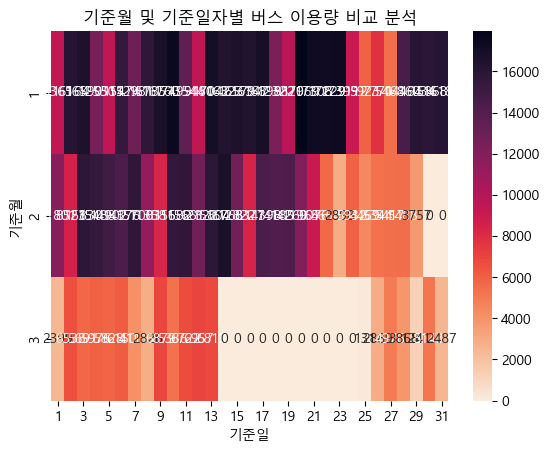

In [16]:
# 그래프 사이즈 정의하기 (너비, 높이)
plt.figure(figsize=(20,10))
plt.show()

plt.title("기준월 및 기준일자별 버스 이용량 비교 분석")

# annot : 박스 안에 숫자를 보이게 할 것인지 정의
# fmt : 소수점 자릿수 정의
# cmap : 색상맵(색상지도), 즉 어떤 색상 그룹을 사용할지 지정 (인터넷에 매우 많은 색상맵이 존재)
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")

plt.show()

In [ ]:
### [숙제]
# - 위 코드를 이용해서...
# - 기준일 및 기준시간, 기준시간 및 기준(분) 각각에 대한 히트맵을 시각화할 수 있는 함수 정의해서 사용하기
# - 함수명 : heatmapView

In [28]:
def heatmapView(df, index, columns, values="승객연령", aggfunc="count", annot=True, title="pivot_table의 히트맵"):
    df_pivot = df.pivot_table(values =values,
                              index  =index,
                              columns=columns,
                              aggfunc=aggfunc)
    
    df_pivot = df_pivot.fillna(0)
    plt.figure(figsize=(20,10))
    plt.title(title)
    sns.heatmap(df_pivot, annot=annot, fmt=".0f", cmap="rocket_r")
    plt.show()

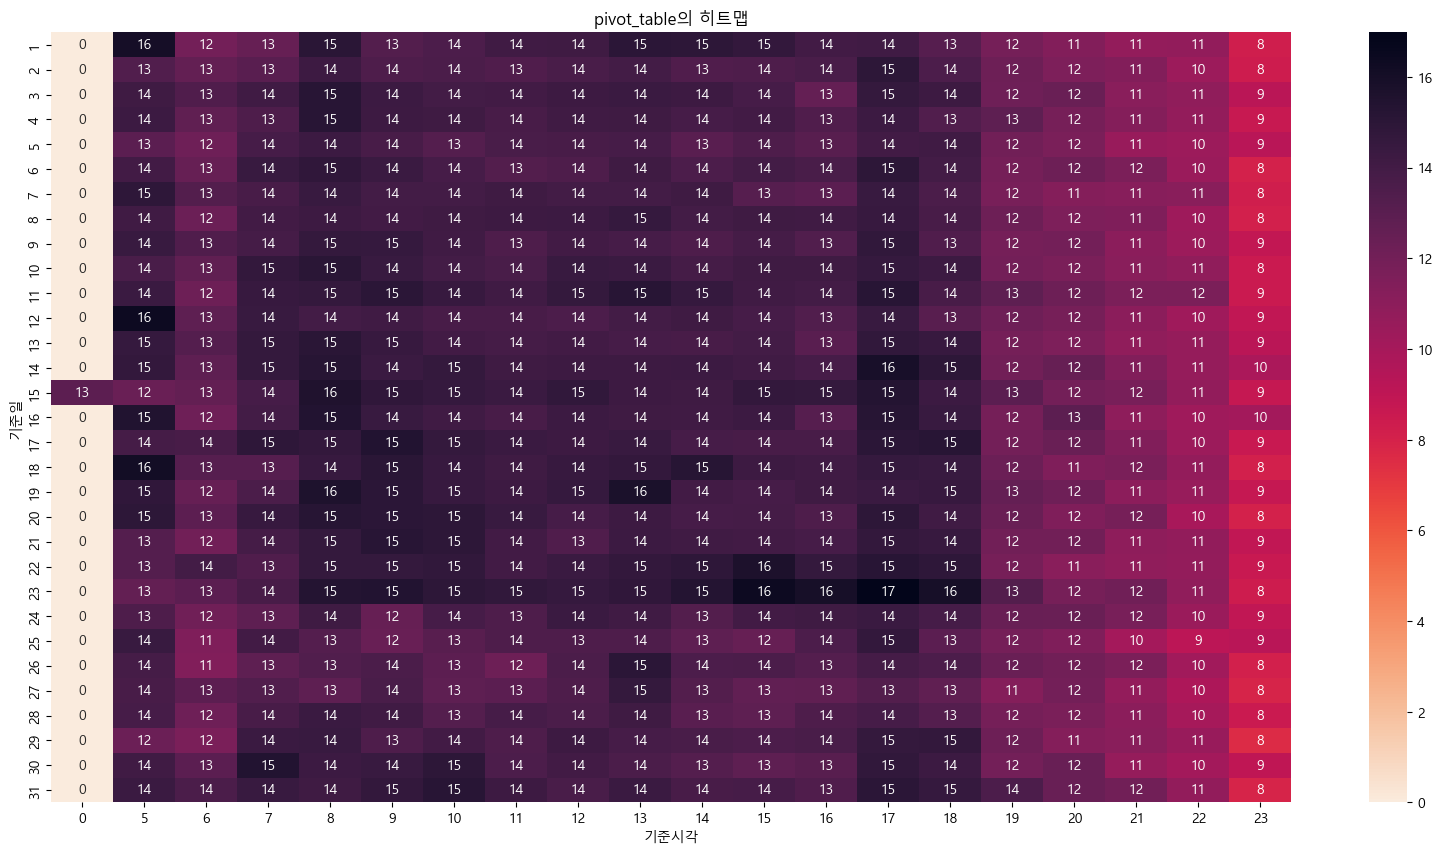

In [30]:
heatmapView(df_bus_card_tot, values="버스내체류시간(분)", index="기준일", columns="기준시각", aggfunc="median")